# 기계학습론 실습과제
### 2017010055 박현일

# 1. 기획

- 사람들은 자기 자신의 소득을 남에게 밝히는 것을 꺼려한다. 하지만 정말 순수하게 다른 사람의 소득은 어느정도인지 궁금할 때가 참 많다.
- 그렇다면 다른 사람의 여러가지 개인정보들을 알면 그 사람의 소득 수준이 어느정도인지 예측해볼 수 있지 않을까? 하는 생각이 든다.
- 그래서 사람들의 여러 개인정보를 수집하여 `소득 수준을 예측하는 기계학습 모델`을 만들기로 계획하였다.
-------------------
- 데이터 수집 시 `개인의 소득 수준이 예측해야하는 Label`이 될 것이다.
- 데이터 수집 시 소득 수준을 `수치형 라벨`(Ex. 연 N천만원, 월 N백만원 등)로 잡는다면 `회귀 모델`이 될 것이다.
- 데이터 수집 시 소득 수준을 `범주형 라벨`(Ex. 연 N천만원 이상이하, 월 N백만원 이상이하)로 잡는다면 `분류 모델`이 될 것이다.

- 모델 학습 시 개인정보를 활용하여 학습해야 하므로 필요할 것으로 `예상되는 Feature는 나이, 성별, 직업, 결혼 여부, 자녀 유무, 재산, 빚, 평균 지출액, 교육 수준 등`이 있다.
- 데이터를 수집하는 가장 좋은 방법은 직접 사람들에게 물어보는 방법이지만 아무래도 민감한 개인정보를 제공받는 것은 쉽지않고 시간 또한 많이 소모된다. 따라서 공신력있는 기관이나 국가에서 제공하는 `인구조사 데이터를 활용`하면 쉽게 데이터를 수집할 수 있을 것이다.

# 2. 데이터 수집 및 시각화

## 2.1 데이터 수집

- UCI Machine Learning Repository에서는 1994년 미국에서 실시한 인구조사 데이터셋을 제공한다. 이 데이터셋을 활용하여 모델을 구축한다.
- 이 데이터셋은 csv파일 형태로 제공되며 pandas Dataframe으로 확인할 수 있다.

In [85]:
import pandas as pd

data = pd.read_csv('Census_Income.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,63,Private,361631,Masters,14,Separated,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,>50K
5378,46,Private,163229,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
5379,59,Private,179594,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
5380,42,Private,254773,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0.0,0.0,50.0,United-States,>50K


- 예측해야하는 Label인 income을 제외하고 모델에 활용할 수 있는 Feature의 수는 총 14개 이며 자세한 설명은 아래와 같다.
![dataset_desc](dataset_desc.png)

In [86]:
len(data.index)

5382

- 데이터셋의 총 레코드 수는 5382개이다.

In [87]:
data['income'].value_counts().to_frame()

,income
<=50K,4077
>50K,1304


- 예측해야하는 Income label은 <=50K, >50K 두 개의 클래스로 구성되어 있으며 범주형 라벨에 속한다. 따라서 분류 모델을 구현하여 분석한다.

## 2.2 데이터 시각화

### 2.2.1 결측치 처리

- 데이터 시각화를 하기 전, 가장 먼저 결측치를 확인한다. 결측치가 있는 상태에서 학습을 진행하면 예상했던 분석 모델과는 전혀 다른 모델이 나오거나 모델 정확도가 떨어질 수 있다.

In [88]:
data.isnull().sum().to_frame("결측치")

,결측치
age,0
workclass,352
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,353
relationship,1
race,1
sex,1


- workclass, occupation, native-country Feature에서 대부분의 결측치가 발견되었다.
- 결측치를 처리하는 방법으로 결측치를 보간하는 방법과 결측치가 포함된 레코드 전체를 제거하는 방법이 있으며 위 3개의 Feature는 범주형 Feature로 결측치를 보간할 수 없으므로 레코드를 삭제하는 방법으로 결측치 처리를 진행한다.
- 이외 나머치 Feature에서 발견된 결측치는 그 수가 매우 적으므로 레코드를 삭제하였다.

In [89]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,43,Private,86750,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,99.0,United-States,<=50K
4927,63,Private,361631,Masters,14,Separated,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,>50K
4928,46,Private,163229,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
4929,59,Private,179594,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


- 결측치를 처리한 후 남은 레코드 수는 4931개 이다.

### 2.2.2 데이터 시각화

- 데이터를 시각화하기 위한 모듈을 임포트한다.

In [90]:
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (7,7)

- 모든 Feature에 대해 plot으로 시각화하며 수치형 속성은 boxplot, 범주형 속성은 barplot으로 나타내도록 한다.

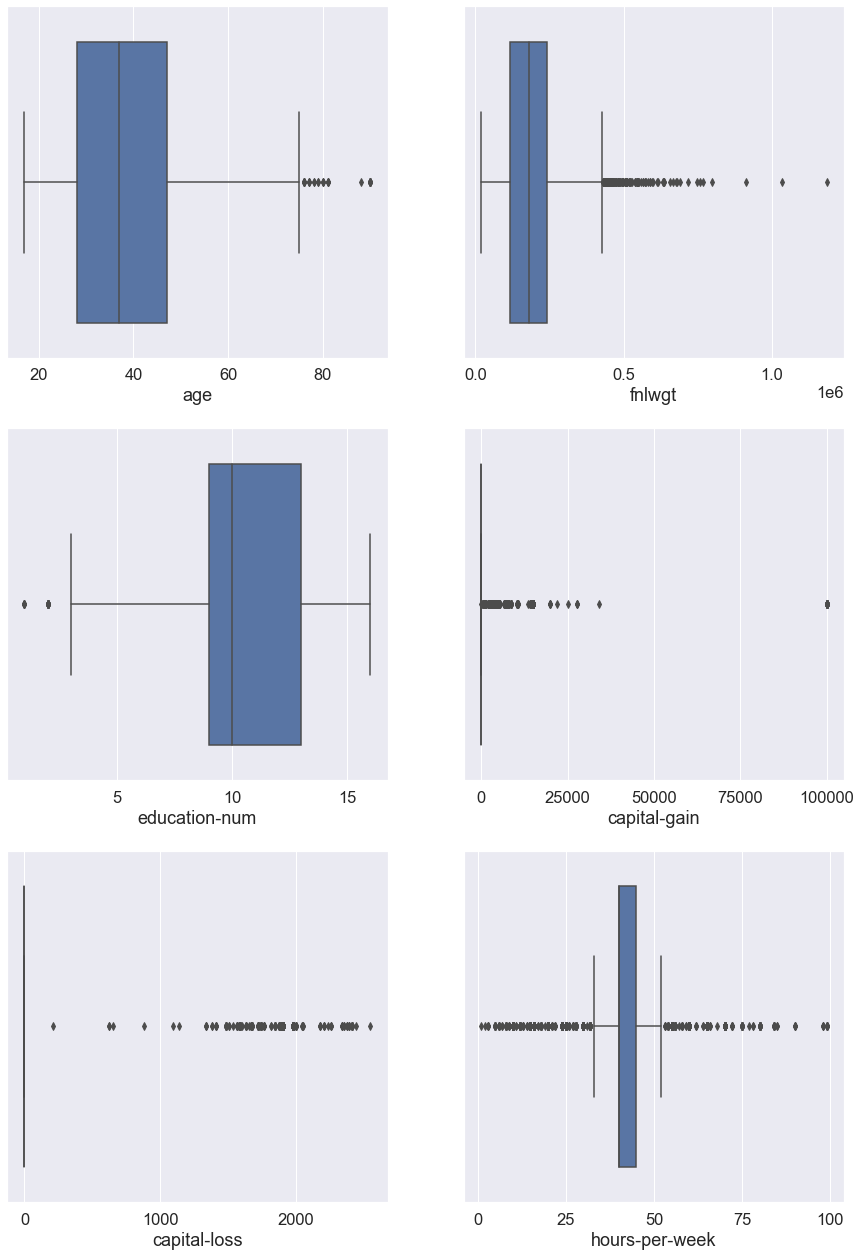

In [91]:
fig, line = plt.subplots(3, 2, figsize=(15,22))
sns.set_theme(font_scale=2)

sns.boxplot(x=data['age'], ax=line[0][0])
sns.boxplot(x=data['fnlwgt'], ax=line[0][1])
sns.boxplot(x=data['education-num'], ax=line[1][0])
sns.boxplot(x=data['capital-gain'], ax=line[1][1])
sns.boxplot(x=data['capital-loss'], ax=line[2][0])
sns.boxplot(x=data['hours-per-week'], ax=line[2][1])

plt.show()

- 각 수치형 속성에 대한 boxplot을 그려보았을 때 age, education-num Feature에선 소수의 이상치를, 나머지 Feature에선 다량의 이상치를 발견하였지만 그 수가 많아 제거하지 않았다.
- 각 수치형 속성간 수의 단위 차이가 매우 크고 평균과 멀리 떨어진 이상치가 많았기 때문에 이를 보정하기위해 향후 데이터 전처리를 진행할 때 표준화를 진행하도록 한다.

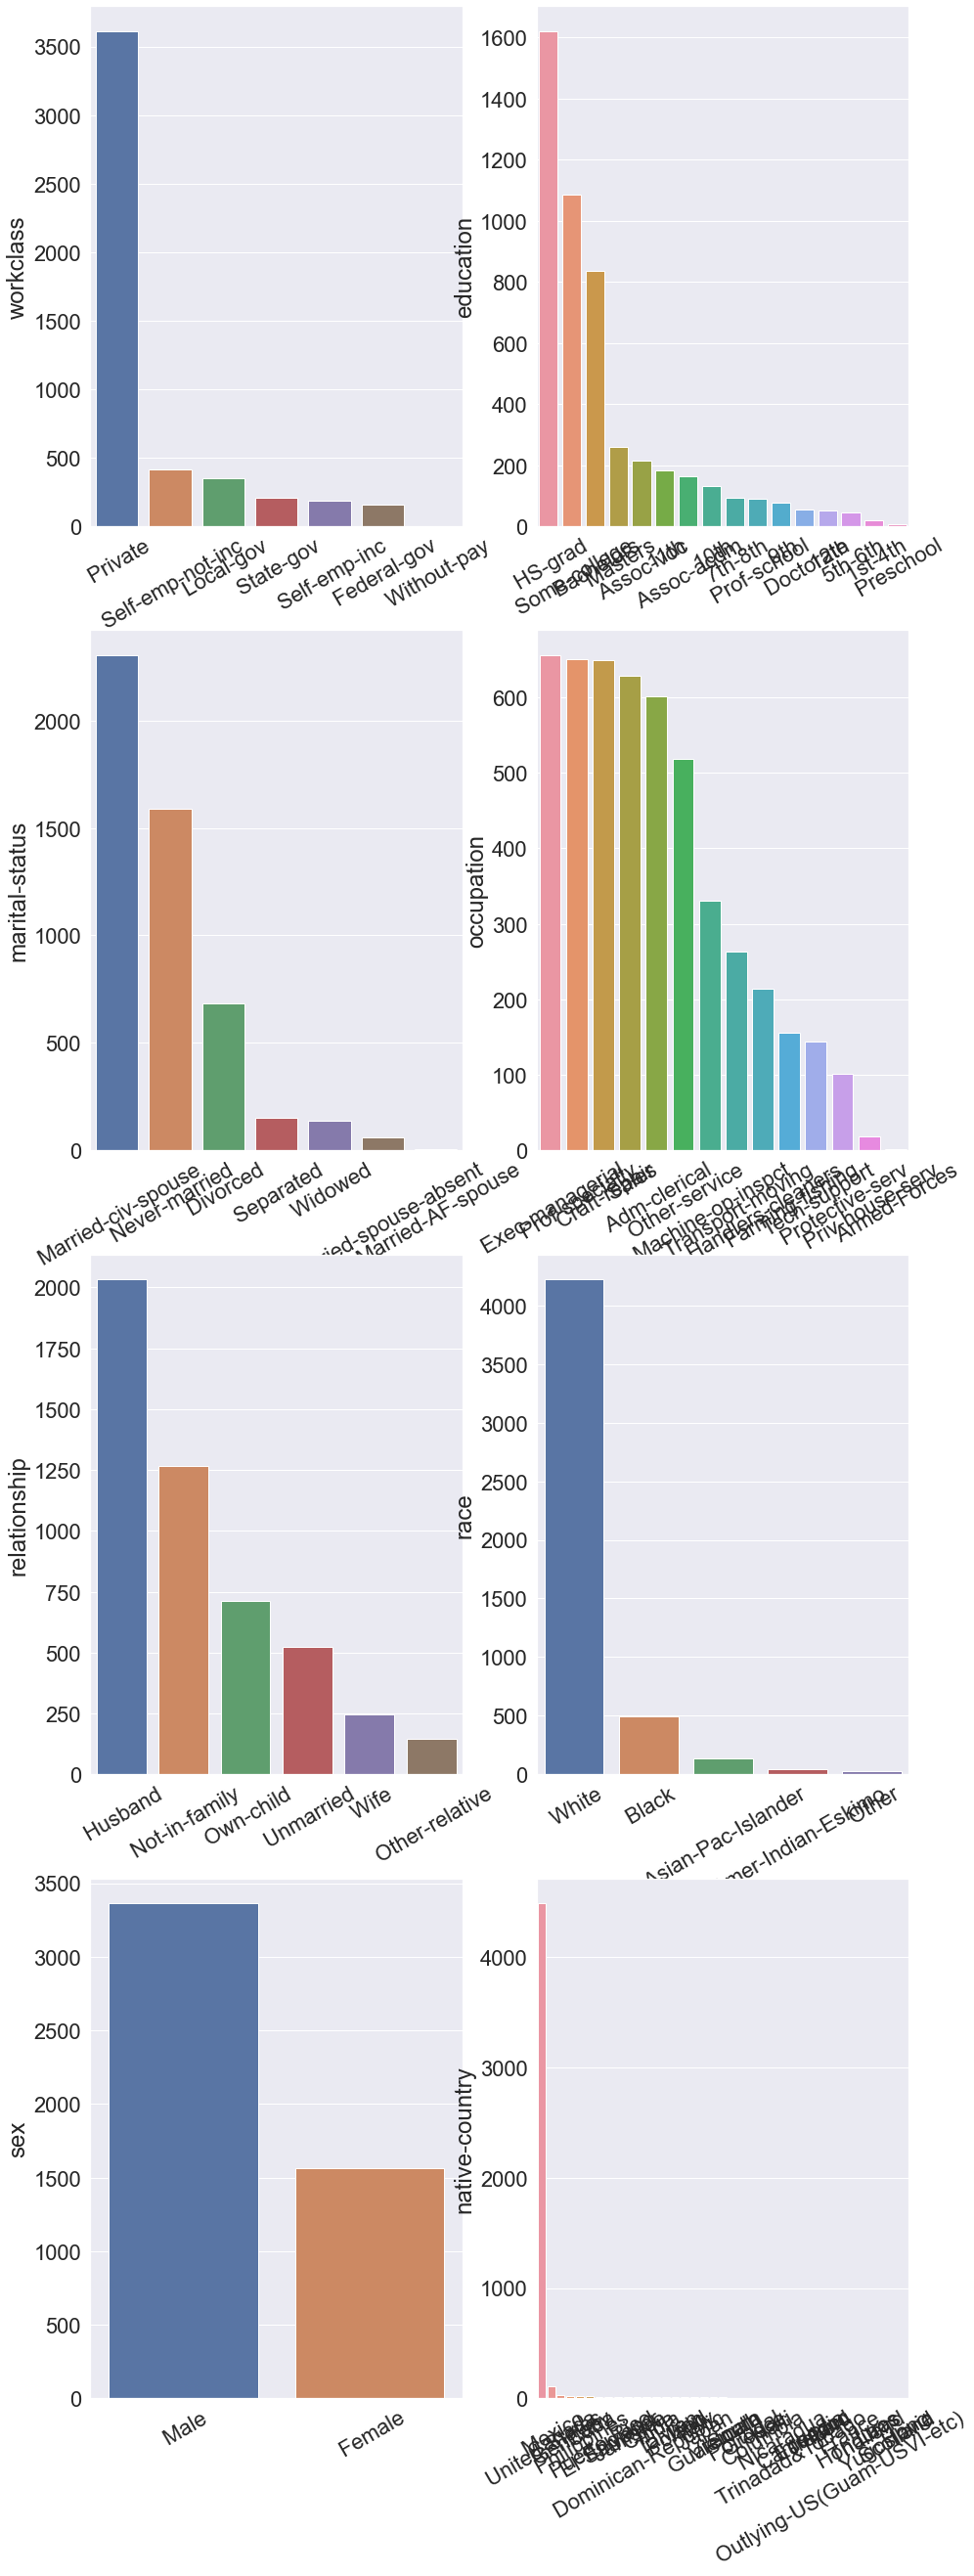

In [92]:
fig, line = plt.subplots(4, 2, figsize=(15,45))
sns.set_theme(font_scale=1.5)

ax = sns.barplot(x=data['workclass'].value_counts().index, y=data['workclass'].value_counts(), ax=line[0][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['education'].value_counts().index, y=data['education'].value_counts(), ax=line[0][1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['marital-status'].value_counts().index, y=data['marital-status'].value_counts(), ax=line[1][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['occupation'].value_counts().index, y=data['occupation'].value_counts(), ax=line[1][1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['relationship'].value_counts().index, y=data['relationship'].value_counts(), ax=line[2][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['race'].value_counts().index, y=data['race'].value_counts(), ax=line[2][1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts(), ax=line[3][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax = sns.barplot(x=data['native-country'].value_counts().index, y=data['native-country'].value_counts(), ax=line[3][1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

plt.show()

- 위 그래프를 살펴보면 이 데이터셋은 개인 직업을 가진 직장인, 백인, 남성, 모국이 미국인 사람의 비율이 타 클래스에 비해 많음을 알 수 있다.

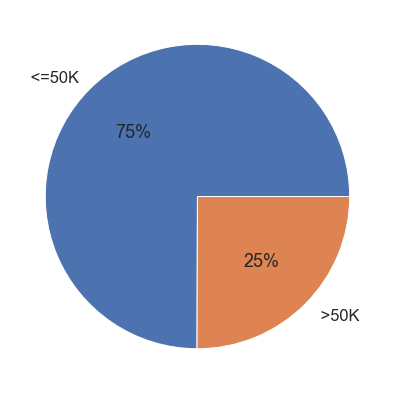

In [93]:
plt.pie(data['income'].value_counts(), labels=data['income'].value_counts().index, autopct='%.0f%%')
plt.show()

- 위 그래프는 예측해야하는 Income label의 클래스 비율을 나타낸다.
- 위 그래프를 보면 클래스의 비율이 약 3:1로 클래스의 불균형을 나타내고 있다.
- 클래스의 불균형은 향후 모델 학습 시에 성능 지표를 떨어뜨릴 것으로 보인다. 따라서 트레이닝 데이터셋과 테스트 데이터셋을 나눌 때 각 데이터셋에 예측 Label 클래스의 비율이 반영될 수 있도록 나누고 모델 학습 시 클래스 비율에 따라 가중치를 적용하여 불균형을 해소할 수 있도록 한다.

# 3. 데이터 전처리

## 3.1 수치형 속성 표준화

- 위 수치형 속성 그래프를 그려보았을 때 각 Feature간 수의 단위 차이가 컸다.
- 이를 해소하기 위해 모든 수치형 데이터를 표준화 한다.

In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data['age'] = scaler.fit_transform(np.array(data['age']).reshape(-1, 1))
data['fnlwgt'] = scaler.fit_transform(np.array(data['fnlwgt']).reshape(-1, 1))
data['education-num'] = scaler.fit_transform(np.array(data['education-num']).reshape(-1, 1))
data['capital-gain'] = scaler.fit_transform(np.array(data['capital-gain']).reshape(-1, 1))
data['capital-loss'] = scaler.fit_transform(np.array(data['capital-loss']).reshape(-1, 1))
data['hours-per-week'] = scaler.fit_transform(np.array(data['hours-per-week']).reshape(-1, 1))
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.037656,State-gov,-1.063678,Bachelors,1.138803,Never-married,Adm-clerical,Not-in-family,White,Male,0.154812,-0.231072,-0.094472,United-States,<=50K
1,0.877496,Self-emp-not-inc,-1.009266,Bachelors,1.138803,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146227,-0.231072,-2.421087,United-States,<=50K
2,-0.038693,Private,0.233290,HS-grad,-0.445800,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146227,-0.231072,-0.094472,United-States,<=50K
3,1.106543,Private,0.412394,11th,-1.238102,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146227,-0.231072,-0.094472,United-States,<=50K
4,-0.802184,Private,1.385969,Bachelors,1.138803,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146227,-0.231072,-0.094472,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,0.343052,Private,-0.976976,Assoc-voc,0.346501,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.146227,-0.231072,4.989614,United-States,<=50K
4927,1.870034,Private,1.604011,Masters,1.534954,Separated,Prof-specialty,Not-in-family,White,Female,-0.146227,-0.231072,-0.094472,United-States,>50K
4928,0.572099,Private,-0.258878,7th-8th,-2.426555,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.146227,-0.231072,-0.094472,United-States,<=50K
4929,1.564637,Private,-0.105220,HS-grad,-0.445800,Married-civ-spouse,Sales,Husband,White,Male,-0.146227,-0.231072,-0.094472,United-States,<=50K


## 3.2 예측 라벨 수치화

- 향후 모델 구현의 편의를 위해 현재 String 타입으로 되어있는 Income 라벨을 숫자로 변환한다.
- <=50K : 0, >50K : 1

In [95]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['income'] = lb.fit_transform(data['income'])
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.037656,State-gov,-1.063678,Bachelors,1.138803,Never-married,Adm-clerical,Not-in-family,White,Male,0.154812,-0.231072,-0.094472,United-States,0
1,0.877496,Self-emp-not-inc,-1.009266,Bachelors,1.138803,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146227,-0.231072,-2.421087,United-States,0
2,-0.038693,Private,0.233290,HS-grad,-0.445800,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146227,-0.231072,-0.094472,United-States,0
3,1.106543,Private,0.412394,11th,-1.238102,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146227,-0.231072,-0.094472,United-States,0
4,-0.802184,Private,1.385969,Bachelors,1.138803,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146227,-0.231072,-0.094472,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,0.343052,Private,-0.976976,Assoc-voc,0.346501,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.146227,-0.231072,4.989614,United-States,0
4927,1.870034,Private,1.604011,Masters,1.534954,Separated,Prof-specialty,Not-in-family,White,Female,-0.146227,-0.231072,-0.094472,United-States,1
4928,0.572099,Private,-0.258878,7th-8th,-2.426555,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.146227,-0.231072,-0.094472,United-States,0
4929,1.564637,Private,-0.105220,HS-grad,-0.445800,Married-civ-spouse,Sales,Husband,White,Male,-0.146227,-0.231072,-0.094472,United-States,0


## 3.3 Feature와 예측 Label 분리

- 모델 구현에 사용할 Feature를 X로, 예측 Label을 Y로 분리한다.

In [96]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1]
print(X.shape, Y.shape)

(4931, 14) (4931,)


# 4. 데이터 분석

## 4.1 성능 지표 확인 함수 구현

- 모델의 성능 지표를 확인할 수 있는 함수를 미리 구현한다.

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred, pos_label=1)
    re = recall_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print("=Confusion matrix=")
    print(confusion)
    print("==================")

    print(f"Acc : {acc:.4f}, Pre : {pre:.4f}")
    print(f"Re : {re:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}")

## 4.2 모델 구현

- 로지스틱 회귀, 결정나무, 랜덤포레스트, LGBM 등 4가지 모델을 구현하여 가장 높은 성능을 내는 모델을 찾는다.

### 4.2.1 로지스틱 회귀

#### 4.2.1.1 범주형 속성 전처리 및 데이터셋 분리

- 범주형 속성이 포함되어있는 데이터셋은 로지스틱 회귀가 불가능하므로 Raw 데이터셋의 범주형 속성을 수치형으로 바꿔주는 원핫 인코딩을 진행한 후 데이터셋을 분리한다.
- 이때 범주형 속성의 모든 클래스를 Feature로 사용하기 때문에 클래스의 수 만큼 Feature가 추가될 것 이다.
- Train 데이터셋과 Test 데이터셋으로 분리할 때 7:3 비율이 되도록 분리한다.
- 데이터셋을 분리할 때 예측 Label의 클래스가 Raw 데이터셋과 같은 비율로 나누어지도록 stratify 파라미터를 사용한다.

In [98]:
from sklearn.preprocessing import OneHotEncoder

X_log = X.copy()
Y_log = Y.copy()

for column in X_log.columns:
    if X_log[column].dtype == object:
        before = X_log[[column]]
        encoder = OneHotEncoder()
        temp = encoder.fit_transform(before)
        X_log.drop(column, axis=1, inplace=True)
        X_log = pd.concat([pd.DataFrame(temp.toarray(), columns=encoder.categories_), X_log], axis=1)
        del encoder
        
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.3, random_state=13, stratify=Y)
X_train_log.reset_index(drop=True, inplace=True)
X_test_log.reset_index(drop=True, inplace=True)
Y_train_log.reset_index(drop=True, inplace=True)
Y_test_log.reset_index(drop=True, inplace=True)

print(X.shape, X_train_log.shape)

(4931, 14) (3451, 102)


- Feature가 기존 14개에서 102개로 늘어난 것을 확인할 수 있다.

#### 4.2.1.2 분석 진행

- 로지스틱 회귀를 진행한다. 이때 라벨 클래스 불균형을 해소하기위해 class_weight='balanced' 파라미터를 넘겨준다.

In [99]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear', class_weight='balanced')
lr_clf.fit(X_train_log, Y_train_log)
lr_pred = lr_clf.predict(X_test_log)

print_clf_eval(Y_test_log, lr_pred)

=Confusion matrix=
[[884 225]
 [ 51 320]]
Acc : 0.8135, Pre : 0.5872
Re : 0.8625, F1 : 0.6987, AUC : 0.8298


- 아래는 class_weight 인자를 넘기지 않은 로지스틱 회귀 모델이다.

In [100]:
lr_clf_unbal = LogisticRegression(random_state=13, solver='liblinear')
lr_clf_unbal.fit(X_train_log, Y_train_log)
lr_pred_unbal = lr_clf_unbal.predict(X_test_log)

print_clf_eval(Y_test_log, lr_pred_unbal)

=Confusion matrix=
[[1050   59]
 [ 149  222]]
Acc : 0.8595, Pre : 0.7900
Re : 0.5984, F1 : 0.6810, AUC : 0.7726


#### 4.2.1.3 결론

- 클래스 불균형을 해소하지않은 모델이 해소한 모델보다 Accuracy가 더 높게 나온다. 하지만 Recall은 크게 뒤떨어지는데 이는 클래스 불균형으로 인한 현상으로 보인다.
- 따라서 클래스 불균형을 해소한 모델이 Accuracy가 조금 낮지만 Recall, F1-score, AUC 지표가 더 높으므로 더 좋은 모델이라고 할 수 있다.

### 4.2.2 결정나무

#### 4.2.2.1 범주형 속성 전처리 및 데이터셋 분리

- 결정나무 구현의 편의를 위해 Raw 데이터셋의 범주형 속성의 클래스를 고유한 숫자 라벨로 바꿔주는 라벨 인코딩을 진행한 후 데이터셋을 분리한다.
- Train 데이터셋과 Test 데이터셋으로 분리할 때 7:3 비율이 되도록 분리한다.
- 데이터셋을 분리할 때 예측 Label의 클래스가 Raw 데이터셋과 같은 비율로 나누어지도록 stratify 파라미터를 사용한다.

In [101]:
from sklearn.preprocessing import LabelEncoder

X_tree = X.copy()
Y_tree = Y.copy()

for column in X_tree.columns:
    if X_tree[column].dtype == object:
        before = X_tree[[column]]
        encoder = LabelEncoder()
        temp = encoder.fit_transform(before)
        X_tree[column] = temp
        del encoder
        
X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X_tree, Y_tree, test_size=0.3, random_state=13, stratify=Y)
X_train_tree.reset_index(drop=True, inplace=True)
X_test_tree.reset_index(drop=True, inplace=True)
Y_train_tree.reset_index(drop=True, inplace=True)
Y_test_tree.reset_index(drop=True, inplace=True)

/Users/mintflavor/tensorflow_macos_venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 4.2.2.2 분석 진행

- 결정나무 모델을 구현하여 분석을 진행한다. 위와 마찬가지로 클래스 불균형을 해소하기 위한 파라미터를 넘겨준다.

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=5, class_weight='balanced')
dt_clf.fit(X_train_tree, Y_train_tree)
dt_pred = dt_clf.predict(X_test_tree)

print_clf_eval(Y_test_tree, dt_pred)

=Confusion matrix=
[[877 232]
 [ 70 301]]
Acc : 0.7959, Pre : 0.5647
Re : 0.8113, F1 : 0.6659, AUC : 0.8011


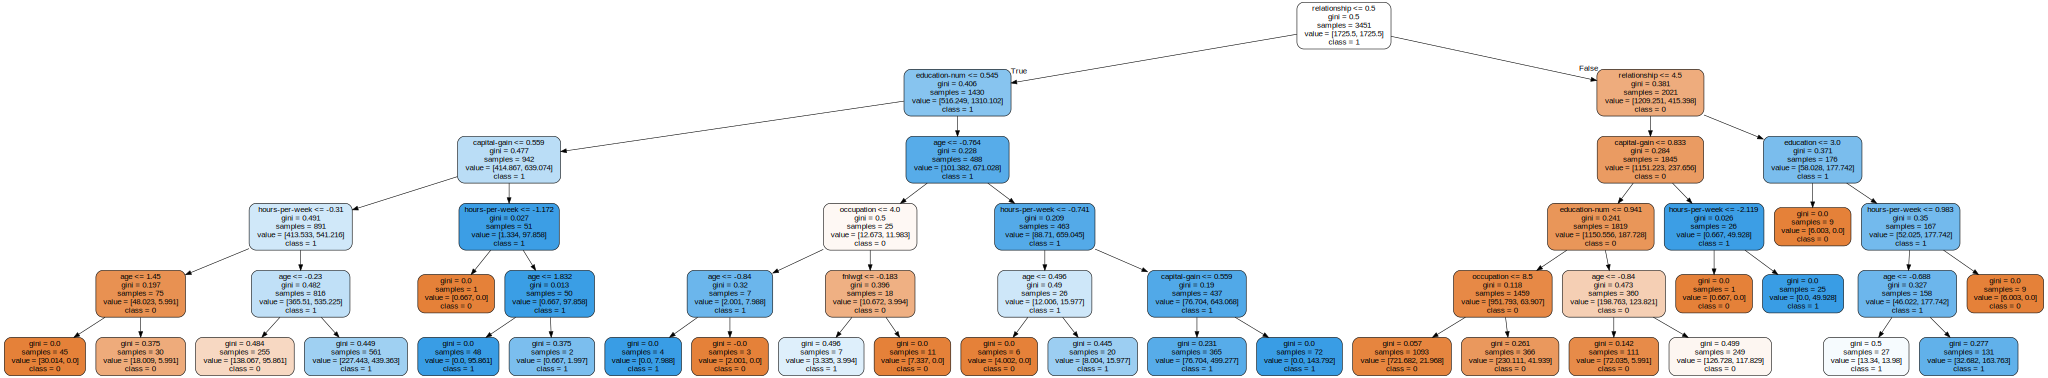

In [103]:
import graphviz
from sklearn.tree import export_graphviz
tree_graph = export_graphviz(dt_clf, out_file=None, class_names=['0', '1'], feature_names=X_tree.columns, filled=True, rounded=True)
graphviz.Source(tree_graph)

- 아래는 class_weight 인자를 넘기지 않은 결정나무 모델이다.

In [104]:
dt_clf_unbal = DecisionTreeClassifier(random_state=13, max_depth=5)
dt_clf_unbal.fit(X_train_tree, Y_train_tree)
dt_pred_unbal = dt_clf_unbal.predict(X_test_tree)

print_clf_eval(Y_test_tree, dt_pred_unbal)

=Confusion matrix=
[[1052   57]
 [ 182  189]]
Acc : 0.8385, Pre : 0.7683
Re : 0.5094, F1 : 0.6126, AUC : 0.7290


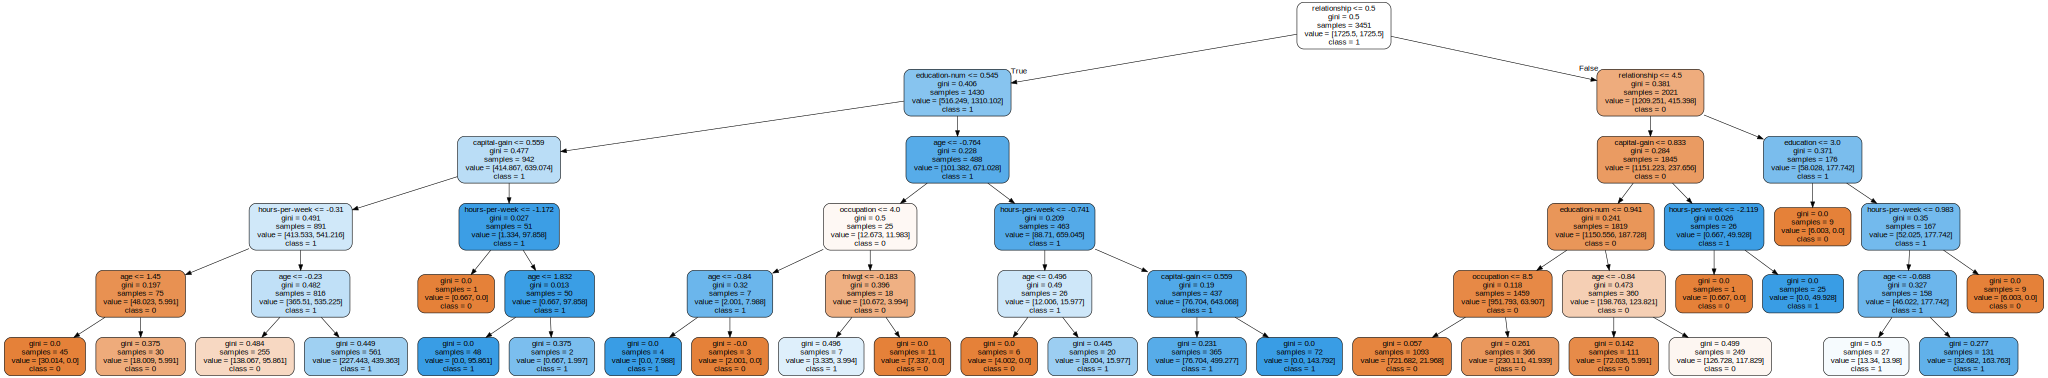

In [105]:
tree_graph = export_graphviz(dt_clf, out_file=None, class_names=['0', '1'], feature_names=X_tree.columns, filled=True, rounded=True)
graphviz.Source(tree_graph)

#### 4.2.2.3 결론

- 로지스틱 회귀 모델과 마찬가지로 예측 라벨 클래스 불균형을 해소하지 않은 모델의 Accuracy가 더 높지만 Recall, F1-score, AUC 등 다른 성능 지표는 불균형 해소 모델이 더 좋은 지표를 보여주고 있다.
- 또한 불균형을 해소하지 않은 모델의 지니계수가 해소 모델에 비해 더 높으므로 불균형을 해소한 모델이 성능이 더 좋다고 말할 수 있다.

### 4.2.3 랜덤포레스트

#### 4.2.3.1 범주형 속성 전처리 및 데이터셋 분리

- 랜덤포레스트는 결정나무를 활용한 앙상블 기법이므로 데이터셋의 전처리와 분리는 위 결정나무와 같은 방식을 사용한다.

In [106]:
X_rf = X.copy()
Y_rf = Y.copy()

for column in X_rf.columns:
    if X_rf[column].dtype == object:
        before = X_rf[[column]]
        encoder = LabelEncoder()
        temp = encoder.fit_transform(before)
        X_rf[column] = temp
        del encoder
        
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.3, random_state=13, stratify=Y)
X_train_rf.reset_index(drop=True, inplace=True)
X_test_rf.reset_index(drop=True, inplace=True)
Y_train_rf.reset_index(drop=True, inplace=True)
Y_test_rf.reset_index(drop=True, inplace=True)

/Users/mintflavor/tensorflow_macos_venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 4.2.3.2 분석 진행

- 랜덤포레스트 모델을 구현하여 분석을 진행한다. 위와 마찬가지로 클래스 불균형을 해소하기 위한 파라미터를 넘겨준다.

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100, class_weight='balanced')
rf_clf.fit(X_train_rf, Y_train_rf)
rf_pred = rf_clf.predict(X_test_rf)

print_clf_eval(Y_test_rf, rf_pred)

=Confusion matrix=
[[1034   75]
 [ 148  223]]
Acc : 0.8493, Pre : 0.7483
Re : 0.6011, F1 : 0.6667, AUC : 0.7667


- 아래는 class_weight 인자를 넘기지 않은 랜덤포레스트 모델이다.

In [108]:
rf_clf_unbal = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf_unbal.fit(X_train_rf, Y_train_rf)
rf_pred_unbal = rf_clf_unbal.predict(X_test_rf)

print_clf_eval(Y_test_rf, rf_pred_unbal)

=Confusion matrix=
[[1034   75]
 [ 144  227]]
Acc : 0.8520, Pre : 0.7517
Re : 0.6119, F1 : 0.6746, AUC : 0.7721


#### 4.2.3.3 결론

- 랜덤포레스트 모델에서는 클래스 불균형을 해소하지않은 모델이 해소 모델에 비해 근소한 차이지만 전체적으로 더 높은 성능 지표를 보여주고 있다.

### 4.2.4 LGBM

#### 4.2.4.1 범주형 속성 전처리 및 분리

- LGBM은 결정나무를 활용한 앙상블 기법이므로 데이터셋의 전처리와 분리는 위 결정나무와 같은 방식을 사용한다.

In [109]:
X_lgbm = X.copy()
Y_lgbm = Y.copy()

for column in X_lgbm.columns:
    if X_lgbm[column].dtype == object:
        before = X_lgbm[[column]]
        encoder = LabelEncoder()
        temp = encoder.fit_transform(before)
        X_lgbm[column] = temp
        del encoder
        
X_train_lgbm, X_test_lgbm, Y_train_lgbm, Y_test_lgbm = train_test_split(X_lgbm, Y_lgbm, test_size=0.3, random_state=13, stratify=Y)
X_train_lgbm.reset_index(drop=True, inplace=True)
X_test_lgbm.reset_index(drop=True, inplace=True)
Y_train_lgbm.reset_index(drop=True, inplace=True)
Y_test_lgbm.reset_index(drop=True, inplace=True)

/Users/mintflavor/tensorflow_macos_venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 4.2.4.2 분석 진행

- LGBM 모델을 구현하여 분석을 진행한다. 위와 마찬가지로 클래스 불균형을 해소하기 위한 파라미터를 넘겨준다.

In [110]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=30, num_leaves=20, n_jobs=-1, boost_from_average=False, class_weight='balanced')
lgbm_clf.fit(X_train_lgbm, Y_train_lgbm)
lgbm_pred = lgbm_clf.predict(X_test_lgbm)

print_clf_eval(Y_test_lgbm, lgbm_pred)

=Confusion matrix=
[[885 224]
 [ 55 316]]
Acc : 0.8115, Pre : 0.5852
Re : 0.8518, F1 : 0.6937, AUC : 0.8249


- 아래는 class_weight 인자를 넘기지 않은 LGBM 모델이다.

In [111]:
lgbm_clf_unbal = LGBMClassifier(n_estimators=30, num_leaves=20, n_jobs=-1, boost_from_average=False)
lgbm_clf_unbal.fit(X_train_lgbm, Y_train_lgbm)
lgbm_pred_unbal = lgbm_clf_unbal.predict(X_test_lgbm)

print_clf_eval(Y_test_lgbm, lgbm_pred_unbal)

=Confusion matrix=
[[1042   67]
 [ 141  230]]
Acc : 0.8595, Pre : 0.7744
Re : 0.6199, F1 : 0.6886, AUC : 0.7798


#### 4.2.4.3 결론

- 랜덤포레스트 모델을 제외한 나머지 모델과 마찬가지로 클래스 불균형을 해소하지 않은 모델이 해소 모델보다 Accuracy는 높지만 다른 성능 지표는 뒤떨어짐을 보여준다.

## 4.3 모델 비교

### 4.3.1 모델 성능 지표 비교를 위한 함수 구현

- 여러 모델의 성능을 쉽게 비교할 수 있는 함수를 미리 구현한다.

In [112]:
def get_result(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(Y_test, pred)

### 4.3.2 4가지 모델의 성능 지표 비교

- 4가지 모델의 성능 지표를 한 눈에 비교하기위한 Dataframe을 출력한다.

In [113]:
models = ['LogisticReg.', 'DecisionTree', 'RandomForest(Unbal)', 'LGBM']
columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
temp = []

temp.append(get_result(lr_clf, X_train_log, Y_train_log, X_test_log, Y_test_log))
temp.append(get_result(dt_clf, X_train_tree, Y_train_tree, X_test_tree, Y_test_tree))
temp.append(get_result(rf_clf_unbal, X_train_rf, Y_train_rf, X_test_rf, Y_test_rf))
temp.append(get_result(lgbm_clf, X_train_lgbm, Y_train_lgbm, X_test_lgbm, Y_test_lgbm))

results = pd.DataFrame(temp, index=models, columns=columns)
results

,Accuracy,Precision,Recall,F1-score,ROC-AUC
LogisticReg.,0.813514,0.587156,0.862534,0.698690,0.829824
DecisionTree,0.795946,0.564728,0.811321,0.665929,0.801062
RandomForest(Unbal),0.852027,0.751656,0.611860,0.674591,0.772116
LGBM,0.811486,0.585185,0.851752,0.693743,0.824884


- 위 표를 보면 랜덤포레스트 모델의 Accuracy가 타 모델에 비해 가장 높아 성능이 제일 좋은 모델처럼 보인다. 하지만 Recall과 ROC-AUC가 가장 뒤떨어진다. 이는 라벨 클래스의 불균형으로 인한 현상으로 보이며 그렇기 때문에 소득 수준을 예측하기에 좋은 모델이라고 할 수 없다.
- 로지스틱 회귀 모델과 LGBM 모델은 두 모델의 성능 지표가 거의 차이가 없으면서 타 모델에 비해 가장 높은 성능 지표를 보여준다. 로지스틱 회귀 모델이 LGBM 모델에 비해 근소한 차이로 전체적인 성능이 앞서고 있으므로 소득 수준을 예측할 때에는 로지스틱 회귀 모델을 활용하는 것이 가장 적절해 보인다.
- 하지만 로지스틱 회귀 모델은 Feature에 범주형 속성이 있다면 OneHotEncoding을 해야하기 때문에 그 속성의 클래스 수만큼 전체 Feature가 증가하는 단점이 있기 때문에 데이터 전처리에서 번거로움이 있거나 모델 학습 시 연산과정이 늘어날 수 있다. 따라서 성능 차이가 거의 없는 LGBM 모델을 선택하는 것도 좋은 차선이 될 것이라 생각한다.

# 5. 최종 정리 및 결론

## 5.1 정리

- 개인의 소득 수준을 예측하기위한 모델을 만들기 위해 나이, 성별, 직업, 교육 수준, 결혼 여부, 자녀 유무 등 개인정보와 관련된 Feature가 포함된 인구조사 데이터셋이 필요할 것으로 예상하였다.
- 실제로 수집한 인구조사 데이터셋에는 위와 같은 Feature는 물론 가족 관계, 인종, 모국 등 다양한 Feature가 총 14개 있었다.
---
- 예측해야하는 라벨은 <=50K, >50K로 범주형 속성이었으며, 이를 분류 문제로 판단하고 로지스틱 회귀 모델, 결정나무, 랜덤포레스트, LGBM 모델을 준비하였다.
---
- 일부 범주형 Feature에서 결측치가 발견되었고 이를 보간하지 않고 제거하는 방향으로 처리하였다.
- 일부 수치형 Feature에서 평균과 멀리 떨어진 다량의 이상치가 발견되었고 이를 보정하기위해 표준화를 진행하였다.
- 예측 Label의 클래스 비율이 약 3:1로 클래스의 불균형이 있음이 확인되었다. 따라서 클래스의 불균형을 해소할 수 있도록 stratify 파라미터를 활용해 클래스의 비율을 반영하여 트레이닝 데이터셋, 테스트 데이터셋을 분리하였다.
---
- 각 모델에서 범주형 Feature를 사용할 수 없어 각 모델에 맞게 OneHotEncoding과 LabelEncoding을 진행하여 학습했다.
- 예측 Label 클래스에 불균형이 있었기 때문에 class_weight 파라미터를 활용해 예측 Label 클래스에 가중치를 부여하는 방식과 그렇지 않은 방식 모두를 비교하였다.
---
- 각 모델의 성능 지표를 비교해보면 로지스틱 회귀 모델과 LGBM 모델이 가장 좋은 성능을 나타내고 있다.

## 5.2 결론

- 네 개의 모델 중 가장 성능이 좋은 두 개의 모델을 확인할 수 있었고 이를 통해 여러 개인정보들을 가지고 있거나 인구조사 데이터를 활용한다면 소득 수준을 예측할 수 있으며 이때 유의미한 결과를 도출할 수 있음을 알 수 있었다.
- 더 나아가 새로운 개인정보 Feature를 추가하거나 각 Feature간 상관분석을 진행하여 독립성을 만족하지않는 Feature를 제거하는 방식으로 모델의 성능지표를 개선할 수 있을 것으로 보인다. 